**Problem Statement: Predicting Diabetes in Pima Indian Women**

---



---



**Description:**


The Pima Indians Diabetes dataset is a collection of medical data from Pima Indian women in Arizona, USA. This dataset is widely used for the development and evaluation of predictive models to identify individuals at high risk of developing diabetes. The goal of this project is to build a predictive model that can accurately classify individuals as either diabetic or non-diabetic based on a set of medical and demographic features.



**Dataset Details:**

The dataset contains the following features:

1.Pregnancies: Number of times pregnant.
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. BloodPressure: Diastolic blood pressure (mm Hg).
4. SkinThickness: Triceps skin fold thickness (mm).
5. Insulin: 2-Hour serum insulin (mu U/ml).
6. BMI: Body mass index (weight in kg / (height in m)^2).
7. DiabetesPedigreeFunction: A function that scores the likelihood of diabetes based on family history.
8. Age: Age in years.
9. Class The binary target variable indicating the presence (1) or absence (0) of diabetes.

Loading the Dataset

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [27]:
df=pd.read_csv("https://raw.githubusercontent.com/preetiiiiiish/Datasets/main/pima-indians-diabetes-2.csv")

In [28]:
df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Performing EDA

In [29]:
df.rename(columns={"Preg":"Pregnancy",	"Plas":"Glucose","Pres":"BloodPressure","skin":"Skinthickness",	"test":"Insulin",	"mass":"BMI","pedi":"DiabetesPedifreeFunction","age":"Age","class":"Class"},inplace=True)

In [30]:
df.head(10)

,Pregnancy,Glucose,BloodPressure,Skinthickness,Insulin,BMI,DiabetesPedifreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [31]:
df.shape

(768, 9)

There are 768 rows and 9 columns in the dataset

In [32]:
df.dtypes

Pregnancy                     int64
Glucose                       int64
BloodPressure                 int64
Skinthickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedifreeFunction    float64
Age                           int64
Class                         int64
dtype: object

In [33]:
df.describe(include="all")

,Pregnancy,Glucose,BloodPressure,Skinthickness,Insulin,BMI,DiabetesPedifreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancy                 768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   Skinthickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedifreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


There are some values in the table that are 0 in Pregnancy, Glucose, Bloodpresure, Skinthickness, Insulin, BMI and class.

In [34]:
df.Glucose=df.Glucose.replace(0,df.Glucose.mean())
df.BloodPressure=df.BloodPressure.replace(0,df.BloodPressure.mean())
df.Skinthickness=df.Skinthickness.replace(0,df.Skinthickness.mean())
df.Insulin=df.Insulin.replace(0,df.Insulin.mean())
df.BMI=df.BMI.replace(0,df.BMI.mean())

In [35]:
df.describe(include="all")

,Pregnancy,Glucose,BloodPressure,Skinthickness,Insulin,BMI,DiabetesPedifreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Now all 0 values are replaced by mean value.

In [36]:
df.isnull().sum()

Pregnancy                   0
Glucose                     0
BloodPressure               0
Skinthickness               0
Insulin                     0
BMI                         0
DiabetesPedifreeFunction    0
Age                         0
Class                       0
dtype: int64

Studying the dependent variable

In [39]:
df["Class"].value_counts()

0    500
1    268
Name: Class, dtype: int64

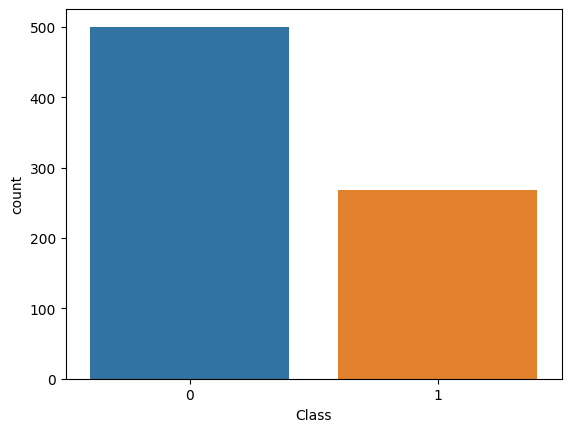

In [41]:
sns.countplot(x="Class",data=df)
plt.show()

Checking for correlation and skewnessin the data

In [42]:
df.skew()

Pregnancy                   0.901674
Glucose                     0.533225
BloodPressure               0.173050
Skinthickness               1.226670
Insulin                     3.291825
BMI                         0.601103
DiabetesPedifreeFunction    1.919911
Age                         1.129597
Class                       0.635017
dtype: float64

<Axes: >

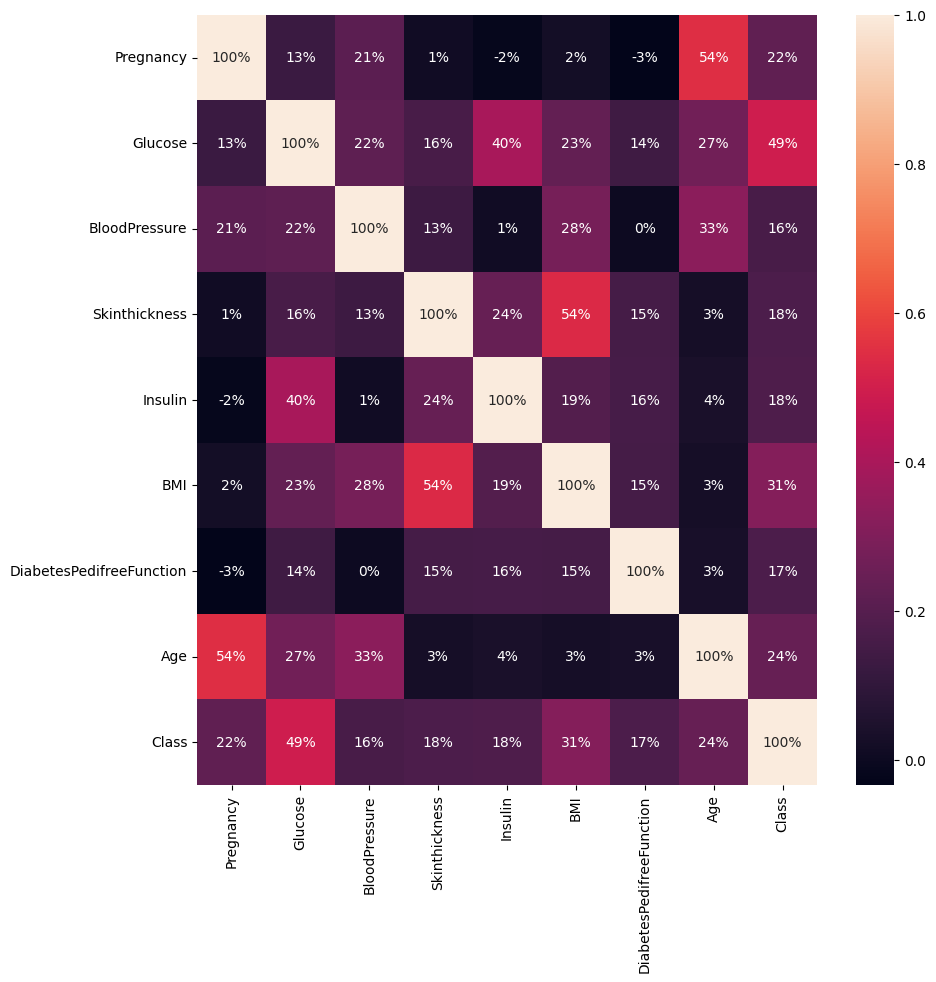

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".0%")

Since there is no apparent and significant relation between columns so we move to building logistic model

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [45]:
x=df.drop(["Class"],axis=1)
y=df["Class"].values

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)

In [54]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)
print("LogisticRegression accuracy : {:.2f}%".format (reg.score(x_test,y_test)*100))

LogisticRegression accuracy : 77.06%


In [55]:
x_test.shape

(231, 8)

In [56]:
reg.score(x_train,y_train)

0.770949720670391

In [57]:
reg.score(x_test,y_test)

0.7705627705627706

In [58]:
predictions=reg.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)## (TP+TN)/(TP+TN+FP+FN)

0.7705627705627706

In [60]:
from sklearn import metrics

In [61]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.69      0.51      0.59        74

    accuracy                           0.77       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.76      0.77      0.76       231



**Confusion Matrix**

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

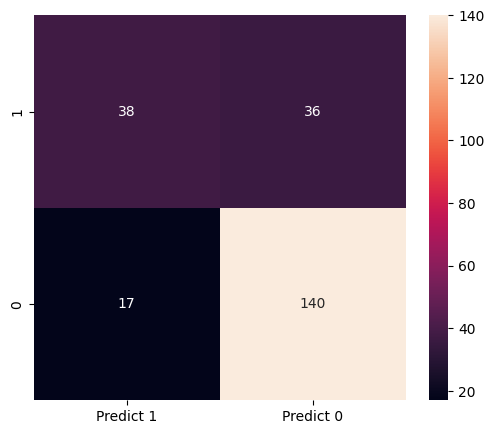

In [63]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                   columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm , annot=True,fmt="g")